# **The Most Effective Way to Develop a Video Games in Mobile Platform**

## **Data Collection**

First thing to do when you want to develop a video games is to decide the platform. There are two choices of platform, which is: Mobile and Personal Computer (PC). Mobile platform is easier to access because almost everyone uses smartphone rather than PC. Mobile game are also easier to code since they need to adjust to the handheld device. Therefore we will use dataset that will provide highest grossing mobile games. 

This [dataset](https://www.kaggle.com/datasets/mattop/highest-grossing-mobile-games) is available on kaggle.

This dataset includes 104 mobile games ranked by their revenue. There are 5 columns:
|No.|Column Name|Data Type|Description|
|-|-|-|-|
|1.|Game|object|Name of the game|
|2.|Revenue|int64|Revenue of the game sales (in USD)|
|3.|Initial Release|object|Release date of the game|
|4.|Publisher(s)|object|Publisher of the game|
|5.|Genre(s)|object|Genre of the game|

## **Analysis Process**

Before we analyze the data, we need to define what makes a game really worth to play? what makes it good? The answer lies in the characteristic of the game itself. The characteristic including: 
* Whether the game is **free** or **paid**,
* Whether the game is **story based**, 
* Whether the game has **microtransaction**, 
* Whether the game has a **gacha mechanic**,
* Whether the game has **Player vs Player** (PVP) competitiveness 

Those characteristics needs to be added to the cleaned dataset and be analyze further to develop a hypothetical best game in mobile platform. After that we could determine the hypothetical effective way to develop a mobile game with Distribution Analysis.

## **Import Libraries**

In [66]:
# Data Manipulation
import numpy as np            
import pandas as pd                  

# Visualization
import matplotlib.pyplot as plt      
import seaborn as sns                

# Ignore warning messages
import warnings
warnings.filterwarnings("ignore") 

## **Data Cleaning**

In [67]:
df=pd.read_csv('highest-grossing-mobile-games.csv', parse_dates=['Initial release'])
display(df.head(),df.tail())

,Game,Revenue,Initial release,Publisher(s),Genre(s)
0,Honor of Kings / Arena of Valor,14667500000,2015-11-26,Tencent Games,MOBA
1,Monster Strike,10000000000,2013-08-08,Mixi,Puzzle / RPG / Strategy
2,PUBG Mobile,9000000000,2018-03-19,Tencent Games / Krafton / VNG Games,Battle royale
3,Puzzle & Dragons,8578340000,2012-02-20,GungHo Online Entertainment,RPG / Puzzle
4,Clash of Clans,8000000000,2012-08-02,Supercell (Tencent),Strategy


,Game,Revenue,Initial release,Publisher(s),Genre(s)
99,Yahtzee With Buddies,113000000,2017-11-01,Scopely,Yahtzee
100,Dragon Quest Tact,111990000,2020-07-16,Square Enix,Tactical RPG
101,Fallout Shelter,100000000,2015-06-14,Bethesda Softworks,Simulation (CMS)
102,Mafia City,100000000,2017-07-25,Yotta Games,RPG
103,Madden NFL Overdrive,100000000,2018-08-15,EA Sports (Electronic Arts),Sports (American football)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Game             104 non-null    object        
 1   Revenue          104 non-null    int64         
 2   Initial release  104 non-null    datetime64[ns]
 3   Publisher(s)     104 non-null    object        
 4   Genre(s)         104 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.2+ KB


In [69]:
pd.set_option('display.max_colwidth',1)
listItem=[]
for col in df.columns:
    listItem.append([
        col,                                                    # Data Feature
        df[col].dtype,                                          # Data Type
        df[col].isna().sum(),                                   # Null
        df[col].nunique(),                                      # Unique
        list(df[col].drop_duplicates().values)]                 # Unique Sample
    )

df_desc=pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Unique', 'Unique Sample'],
                     data=listItem)
df_desc

,Data Features,Data Type,Null,Unique,Unique Sample
0,Game,object,0,104,"[Honor of Kings / Arena of Valor, Monster Strike, PUBG Mobile, Puzzle & Dragons, Clash of Clans, Pokémon Go, Candy Crush Saga, Fate/Grand Order, Fantasy Westward Journey, Garena Free Fire, Roblox Mobile, Genshin Impact, Lineage M, Dragon Ball Z: Dokkan Battle, Coin Master, Clash Royale, Gardenscapes, Game of War: Fire Age, Lords Mobile, Homescapes, Pro Yakyū Spirits A / Pro Baseball Spirits A, Lineage 2: Revolution, Candy Crush Soda Saga, Three Kingdoms Tactics, Marvel Contest of Champions, Toon Blast, Disney Tsum Tsum, Call of Duty: Mobile, Knives Out, AFK Arena, Lineage 2 M, Hay Day, Brawl Stars, Summoners War: Sky Arena, Fortnite, Onmyoji, Star Wars: Galaxy of Heroes, Boom Beach, Mobile Strike, Mobile Legends: Bang Bang, Fire Emblem Heroes, Uma Musume Pretty Derby, QQ Speed Mobile / Speed Drifters, Dragon Ball Legends, Dragon Quest Walk, Rise of Kingdoms, Fishdom, Township, A Chinese Ghost Story, Marvel Strike Force, Toy Blast, Granblue Fantasy, Honkai Impact 3rd, King of Avalon, Clash of Kings, The Seven Deadly Sins: Grand Cross, Hearthstone, The Battle Cats, The Idolmaster Cinderella Girls: Starlight Stage, Final Fantasy XV: A New Empire, Guns of Glory, League of Legends: Wild Rift, Minecraft, Crossfire Mobile, Blade & Soul Revolution, Bingo Blitz, Harry Potter: Hogwarts Mystery, 8 Ball Pool, Harry Potter: Magic Awakened, Angry Birds 2, FIFA Mobile / FIFA Soccer, Lineage W, Black Desert Mobile, Yu-Gi-Oh! Duel Links, Mario Kart Tour, Animal Crossing: Pocket Camp, #COMPASS, Raid: Shadow Legends, Star Trek Fleet Command, Project Makeover, Harry Potter: Puzzles & Spells, DomiNations, Candy Crush Friends Saga, Top War, Empire & Puzzles, KartRider Rush+, Dragalia Lost, Perfect World Mobile, Three Kingdoms Fantasy Land, Candy Crush Jelly Saga, Jikkyō Powerful Pro Yakyū, Puzzles & Survival, Slotomania, NBA Live Mobile, White Cat Project, BanG Dream! Girls Band Party!, CSR Racing 2, One Piece: Burning Will, One Piece: The Road of the Strong, Yahtzee With Buddies, ...]"
1,Revenue,int64,0,93,"[14667500000, 10000000000, 9000000000, 8578340000, 8000000000, 7760000000, 7456000000, 6300000000, 4700000000, 4330000000, 3919000000, 3567000000, 3578000000, 3500000000, 3008000000, 3000000000, 2800000000, 2576700000, 2294000000, 2200000000, 2106770000, 2000000000, 1936200000, 1784000000, 1600000000, 1500000000, 1485270000, 1450000000, 1413000000, 1400000000, 1350000000, 1200000000, 1129000000, 1071000000, 1000000000, 990000000, 945000000, 930000000, 927720000, 926000000, 923600000, 922100000, 860000000, 846000000, 820000000, 754200000, 731000000, 721000000, 700000000, 680000000, 660000000, 600000000, 524000000, 518400000, 510000000, 505000000, 500000000, 458000000, 457000000, 443000000, 401000000, 400000000, 358000000, 332500000, 308700000, 302985000, 300000000, 284000000, 282000000, 281000000, 247000000, 222000000, 218000000, 200000000, 192000000, 186000000, 169000000, 168000000, 165000000, 161600000, 158000000, 155000000, 151000000, 149000000, 140000000, 134000000, 124050000, 121500000, 117000000, 113840000, 113000000, 111990000, 100000000]"
2,Initial release,datetime64[ns],0,100,"[2015-11-26T00:00:00.000000000, 2013-08-08T00:00:00.000000000, 2018-03-19T00:00:00.000000000, 2012-02-20T00:00:00.000000000, 2012-08-02T00:00:00.000000000, 2016-07-06T00:00:00.000000000, 2012-11-14T00:00:00.000000000, 2015-07-30T00:00:00.000000000, 2015-03-26T00:00:00.000000000, 2017-12-04T00:00:00.000000000, 2012-12-11T00:00:00.000000000, 2020-09-28T00:00:00.000000000, 2017-06-21T00:00:00.000000000, 2015-01-30T00:00:00.000000000, 2016-03-02T00:00:00.000000000, 2016-07-05T00:00:00.000000000, 2013-07-25T00:00:00.000000000, 2016-02-26T00:00:00.000000000, 2017-09-15T00:00:00.000000000, 2015-10-21T00:00:00.000000000, 2016-12-14T00:00:00.000000000, 2014-10-20T00:00:00.000000000, 2019-09-19T00:00:00.000000000, 2014-12-10T00:00:00.000000000, 2017-03-03T00:00:00.000000000, 2014-01-29T00:00:00.00000000

The data seemed clean, without any typo or null. Next is to add a new data that has been modified.

In [70]:
df2=pd.read_excel('highest-grossing-mobile-games-new.xlsx')
df2[['Free','Story','Microtransaction','Gacha','PVP']]=df2[['Free','Story','Microtransaction','Gacha','PVP']].replace({'Yes': True, 'No': False})
display(df2.head(),df2.tail())

,Game,Revenue,Initial release,Publisher(s),Genre(s),Free,Story,Microtransaction,Gacha,PVP
0,Honor of Kings / Arena of Valor,14667500000,2015-11-26,Tencent Games,MOBA,True,False,True,True,True
1,Monster Strike,10000000000,2013-08-08,Mixi,Puzzle / RPG / Strategy,True,False,True,True,False
2,PUBG Mobile,9000000000,2018-03-19,Tencent Games / Krafton / VNG Games,Battle royale,True,False,True,True,True
3,Puzzle & Dragons,8578340000,2012-02-20,GungHo Online Entertainment,RPG / Puzzle,True,False,True,False,True
4,Clash of Clans,8000000000,2012-08-02,Supercell (Tencent),Strategy,True,False,True,False,True


,Game,Revenue,Initial release,Publisher(s),Genre(s),Free,Story,Microtransaction,Gacha,PVP
99,Yahtzee With Buddies,113000000,2017-11-01,Scopely,Yahtzee,True,False,True,False,True
100,Dragon Quest Tact,111990000,2020-07-16,Square Enix,Tactical RPG,True,False,True,False,True
101,Fallout Shelter,100000000,2015-06-14,Bethesda Softworks,Simulation (CMS),True,False,True,False,False
102,Mafia City,100000000,2017-07-25,Yotta Games,RPG,True,True,True,False,False
103,Madden NFL Overdrive,100000000,2018-08-15,EA Sports (Electronic Arts),Sports (American football),True,False,True,True,True


The new data have been added a new columns from Ms. Excel. New columns including:
|No.|Column Name|Data Type|Description|
|-|-|-|-|
|1.|Game|object|Name of the game|
|2.|Revenue|int64|Revenue of the game sales (in USD)|
|3.|Initial Release|datetime64|Release date of the game|
|4.|Publisher(s)|object|Publisher of the game|
|5.|Genre(s)|object|Genre of the game|
|6.|Free|bool|Shows whether the game is Free or Paid|
|7.|Story|bool|Shows whether the game is story based or gameplay based|
|8.|Microtransaction|bool|Shows whether the game has microtransaction or not|
|9.|Gacha|bool|Shows whether the game has gacha system or not|
|10.|PVP|bool|Shows whether the game has PVP or not|

The bool columns are representing True and False, which equals to Yes and No.

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Game              104 non-null    object        
 1   Revenue           104 non-null    int64         
 2   Initial release   104 non-null    datetime64[ns]
 3   Publisher(s)      104 non-null    object        
 4   Genre(s)          104 non-null    object        
 5   Free              104 non-null    bool          
 6   Story             104 non-null    bool          
 7   Microtransaction  104 non-null    bool          
 8   Gacha             104 non-null    bool          
 9   PVP               104 non-null    bool          
dtypes: bool(5), datetime64[ns](1), int64(1), object(3)
memory usage: 4.7+ KB


## **Game Price**

In [72]:
# Dataframe Microtransaction & Count
price_count=df2['Free'].value_counts().reset_index()
price_count.columns=['Free', 'Count']
price_count

,Free,Count
0,True,104


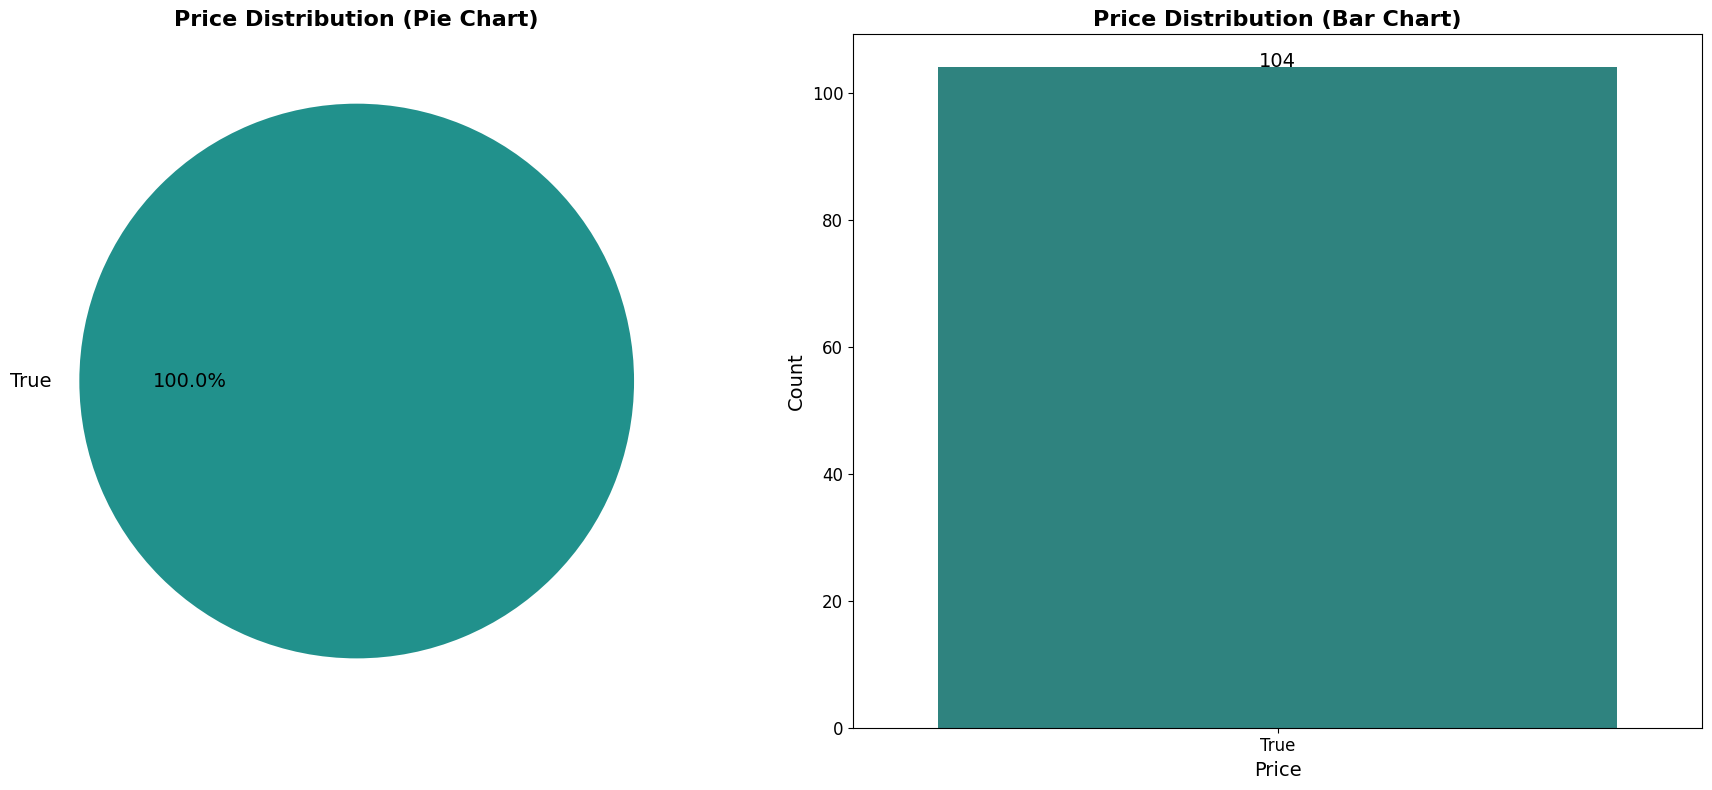

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Pie Chart
axes[0].pie(price_count['Count'], 
            labels=price_count['Free'], 
            autopct='%1.1f%%', 
            colors=sns.color_palette('viridis', len(price_count)),
            textprops={'fontsize': 14})
axes[0].set_title('Price Distribution (Pie Chart)', fontsize=16, fontweight='bold')

# Bar Chart
sns.barplot(x='Free', y='Count', data=price_count, palette='viridis', ax=axes[1])
axes[1].set_title('Price Distribution (Bar Chart)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Price', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Label
for index, value in enumerate(price_count['Count']):
    axes[1].text(index, value, str(value), color='black', ha="center", fontsize=14)

plt.tight_layout()
plt.show()

Insight
* All of the top 104 mobile games from highest revenue are free. 
* We can conclude that the initial paid for the game is not the source of the revenue. 
* This finding is interesting because we need to check each game's revenue to see if free games does actually work in the terms of profit.
* Since the game all are free, the publishers is also capable to make potential players download the game first before going far with microtransactions.

## **Game Revenue**

In [74]:
# Top 20 Games based on Revenue
top_20_price=df2.groupby('Game')['Revenue'].sum().reset_index()
top_20_price=top_20_price.sort_values(by='Revenue', ascending=False).reset_index().drop(columns='index').head(20)
top_20_price


,Game,Revenue
0,Honor of Kings / Arena of Valor,14667500000
1,Monster Strike,10000000000
2,PUBG Mobile,9000000000
3,Puzzle & Dragons,8578340000
4,Clash of Clans,8000000000
5,Pokémon Go,7760000000
6,Candy Crush Saga,7456000000
7,Fate/Grand Order,6300000000
8,Fantasy Westward Journey,4700000000
9,Garena Free Fire,4330000000


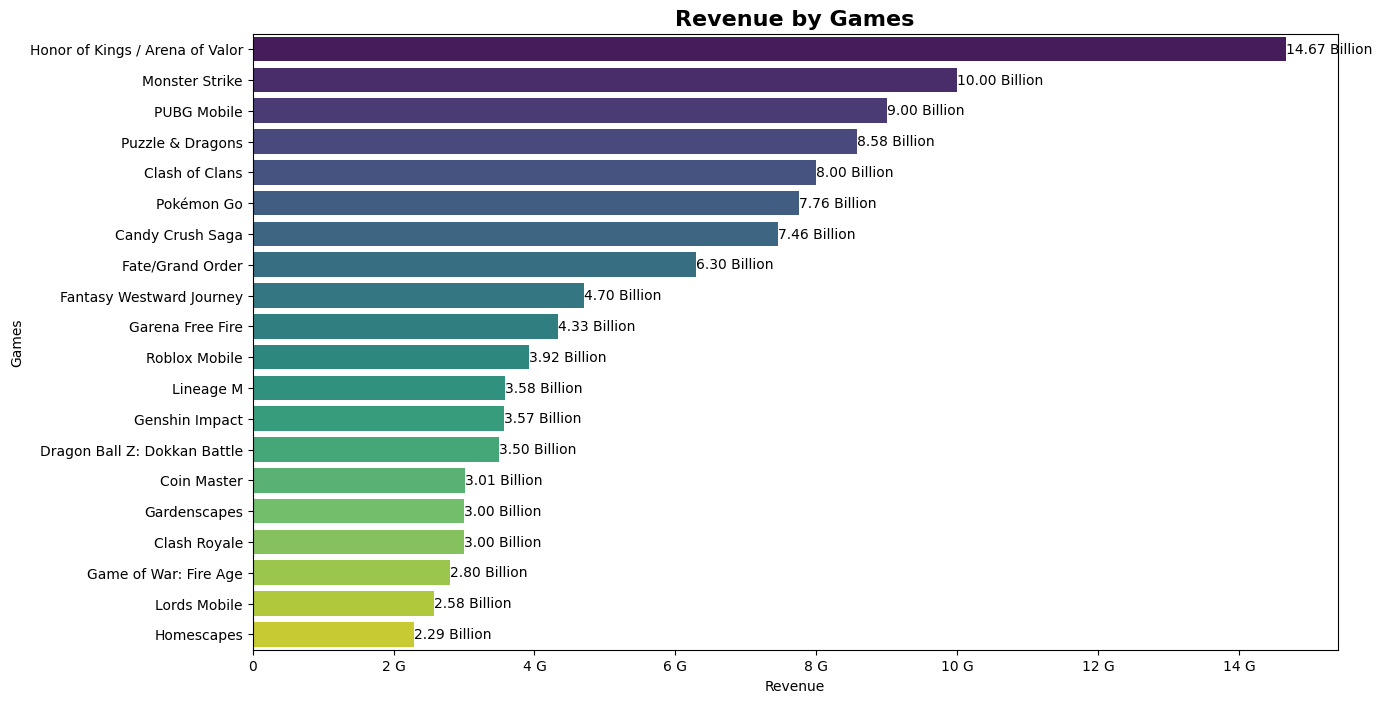

In [75]:
from matplotlib import ticker
plt.figure(figsize=(14, 8))

# Bar Chart
sns.barplot(x='Revenue', y='Game', data=top_20_price, palette='viridis')
plt.title('Revenue by Games', fontsize=16, fontweight='bold')
plt.xlabel('Revenue')
plt.ylabel('Games')
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter())

for index, value in enumerate(top_20_price['Revenue']):
    plt.text(value, index, f'{(value/1000000000):,.2f} Billion', color='black', ha="left", va="center")
    
plt.show()

Insight
* Popular mobile games that could be considered as Top 20 most highest grossing are all have more than a billion USD of revenue 
* Besides that, there is also the fact that we could produce much gross profit since all of these games are free. Next question is, where do they got the revenue from?

## **Microtransaction**

In [76]:
# Dataframe Microtransaction & Count
microtransaction_count=df2['Microtransaction'].value_counts().reset_index()
microtransaction_count.columns=['Microtransaction', 'Count']
microtransaction_count

,Microtransaction,Count
0,True,104


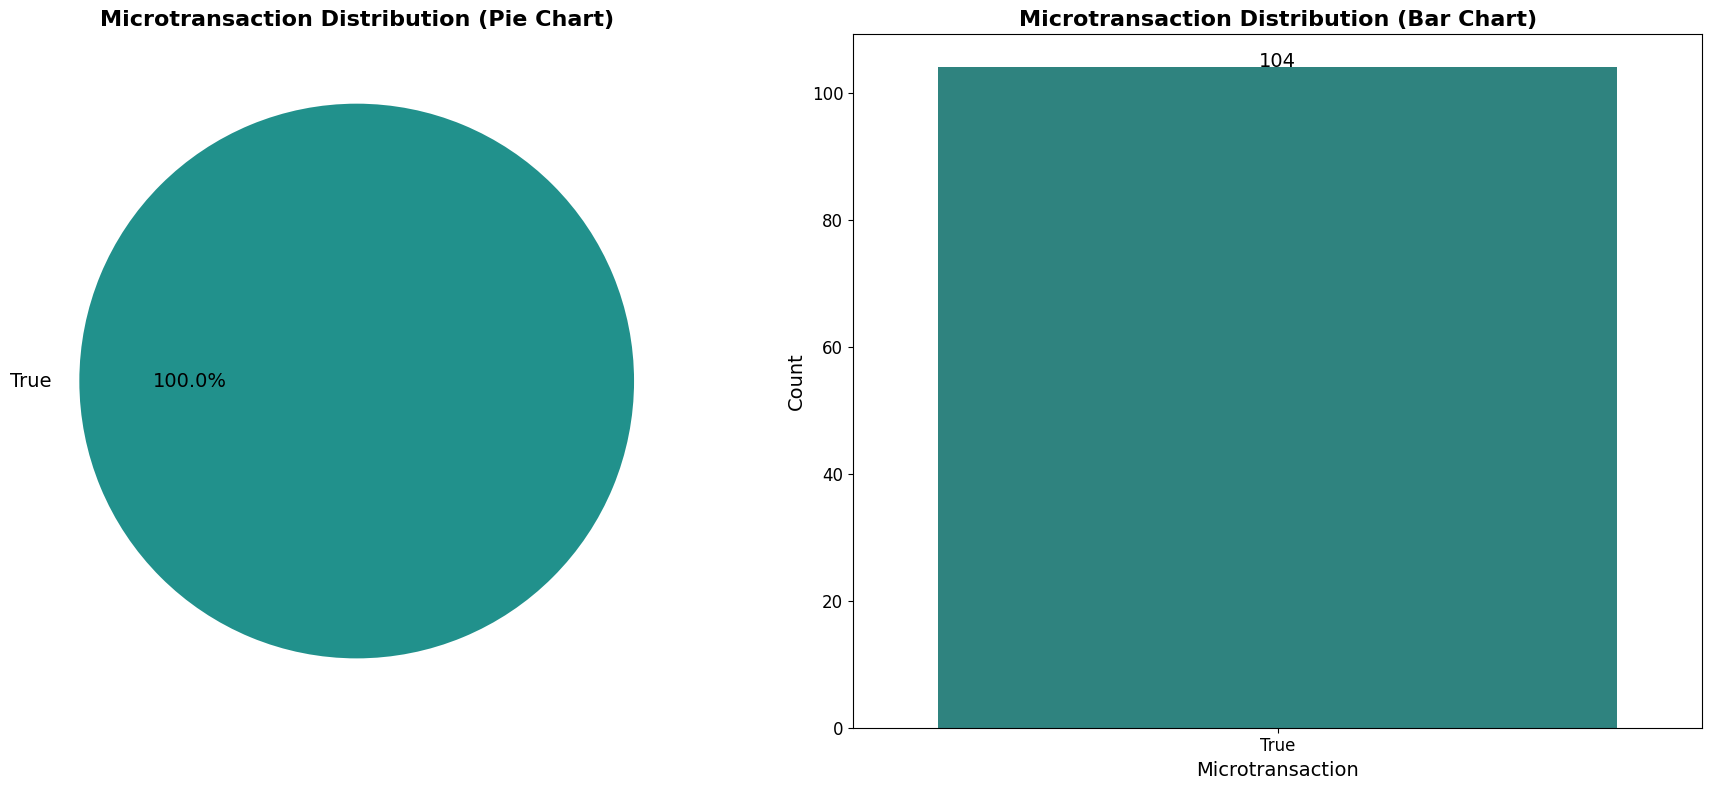

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Pie Chart
axes[0].pie(microtransaction_count['Count'], 
            labels=microtransaction_count['Microtransaction'], 
            autopct='%1.1f%%', 
            colors=sns.color_palette('viridis', len(microtransaction_count)),
            textprops={'fontsize': 14})
axes[0].set_title('Microtransaction Distribution (Pie Chart)', fontsize=16, fontweight='bold')

# Bar Chart
sns.barplot(x='Microtransaction', y='Count', data=microtransaction_count, palette='viridis', ax=axes[1])
axes[1].set_title('Microtransaction Distribution (Bar Chart)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Microtransaction', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Label
for index, value in enumerate(microtransaction_count['Count']):
    axes[1].text(index, value, str(value), color='black', ha="center", fontsize=14)

plt.tight_layout()
plt.show()

Insight:
* All of the top 104 mobile games from highest revenue have microtransaction. 
* Since top 104 mobile games have more than a billion USD revenue while the price of games are free, we can also safely conclude that these microtransaction could be their main revenue. 

## **Story and Gameplay**

In [78]:
# Dataframe Story & Count
story_count=df2['Story'].value_counts().reset_index()
story_count.columns=['Story', 'Count']
story_count

,Story,Count
0,False,87
1,True,17


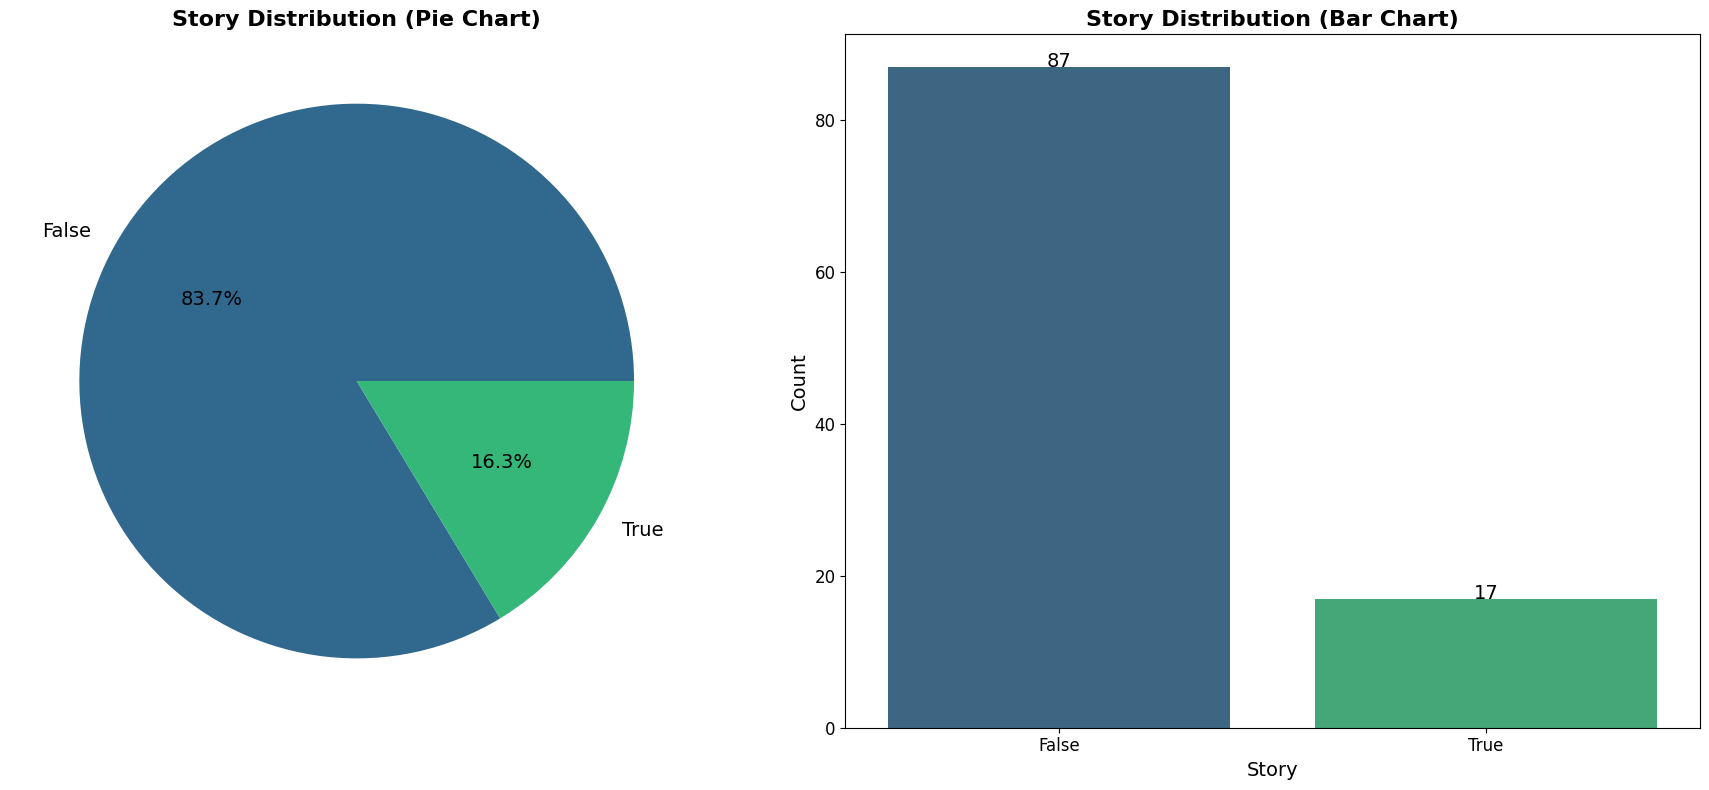

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Pie Chart
axes[0].pie(story_count['Count'], 
            labels=story_count['Story'], 
            autopct='%1.1f%%', 
            colors=sns.color_palette('viridis', len(story_count)),
            textprops={'fontsize': 14})
axes[0].set_title('Story Distribution (Pie Chart)', fontsize=16, fontweight='bold')

# Bar Chart
sns.barplot(x='Story', y='Count', data=story_count, palette='viridis', ax=axes[1])
axes[1].set_title('Story Distribution (Bar Chart)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Story', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Label
for index, value in enumerate(story_count['Count']):
    axes[1].text(index, value, str(value), color='black', ha="center", fontsize=14)

plt.tight_layout()
plt.show()

Insight
* This data shows that most of mobile games does not really needed to add a particular storyline, 
* Mobile game could simply be a gameplay-based only without needed a scriptwriter to actually build the storyline.

## **Gacha**

In [80]:
# Dataframe Microtransaction & Count
gacha_count=df2['Gacha'].value_counts().reset_index()
gacha_count.columns=['Gacha', 'Count']
gacha_count=gacha_count.sort_values(by='Count', ascending=True).reset_index().drop(columns='index')
gacha_count

,Gacha,Count
0,False,27
1,True,77


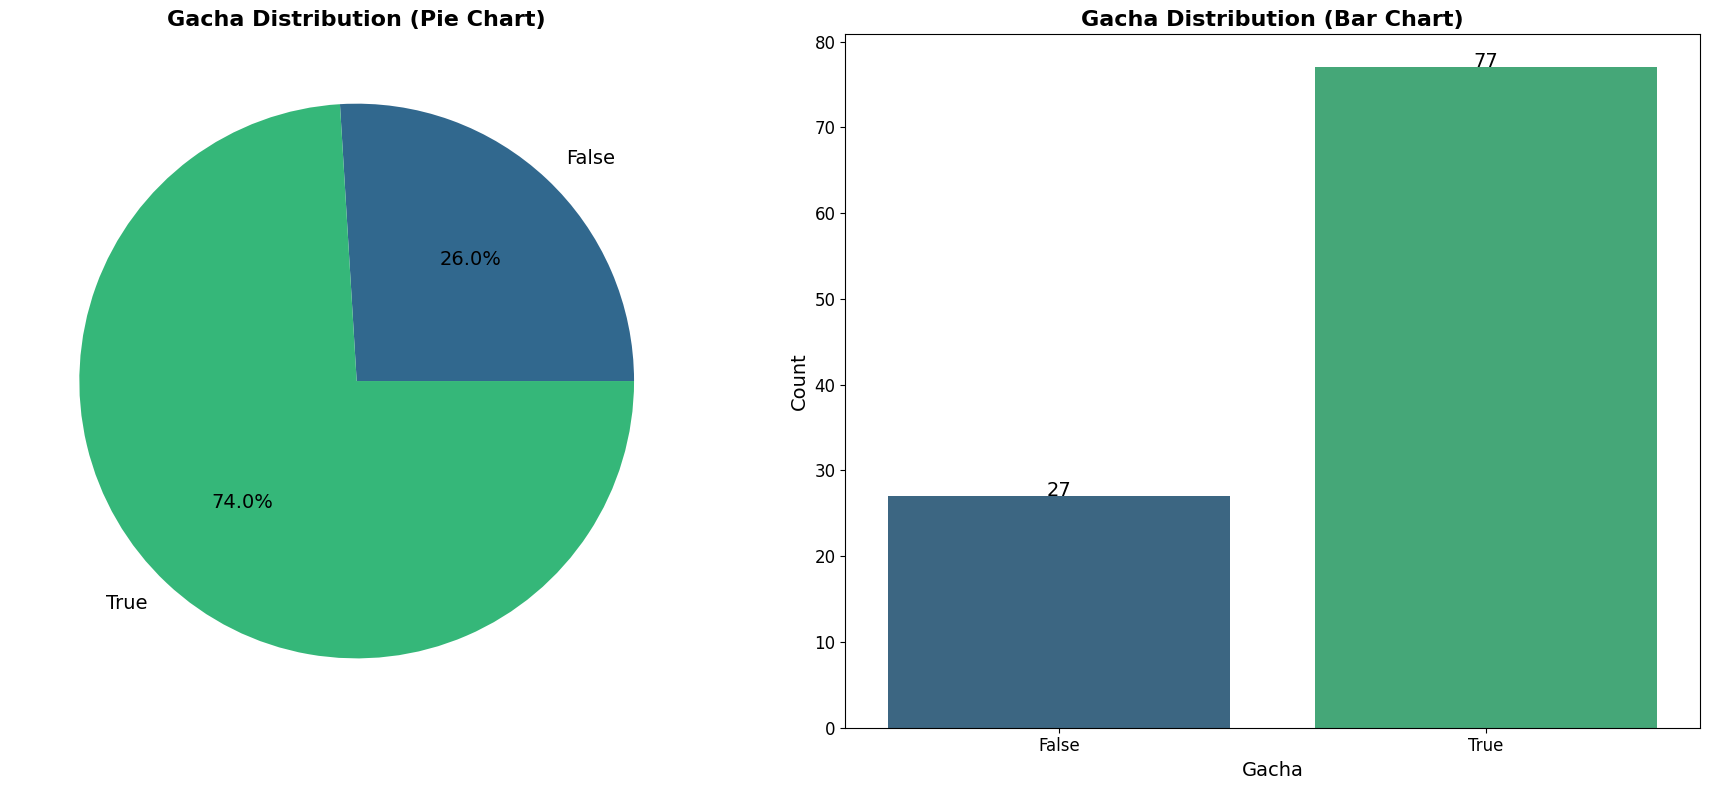

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Pie Chart
axes[0].pie(gacha_count['Count'], 
            labels=gacha_count['Gacha'], 
            autopct='%1.1f%%', 
            colors=sns.color_palette('viridis', len(gacha_count)),
            textprops={'fontsize': 14})
axes[0].set_title('Gacha Distribution (Pie Chart)', fontsize=16, fontweight='bold')

# Bar Chart
sns.barplot(x='Gacha', y='Count', data=gacha_count, palette='viridis', ax=axes[1])
axes[1].set_title('Gacha Distribution (Bar Chart)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Gacha', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Label
for index, value in enumerate(gacha_count['Count']):
    axes[1].text(index, value, str(value), color='black', ha="center", fontsize=14)

plt.tight_layout()
plt.show()

Insight
* Only one-fourth game that does not have any gacha system while the three-quarter have a gacha system. 
* The gacha system tied directly to microtransaction, because player could brought in-game currency with a real money.
* Because of that we knew that the player must spend a lot of money since the revenue could reach a billions

## **PVP**

In [82]:
# Dataframe Microtransaction & Count
pvp_count=df2['PVP'].value_counts().reset_index()
pvp_count.columns=['PVP', 'Count']
pvp_count=pvp_count.sort_values(by='Count', ascending=True).reset_index().drop(columns='index')
pvp_count

,PVP,Count
0,False,19
1,True,85


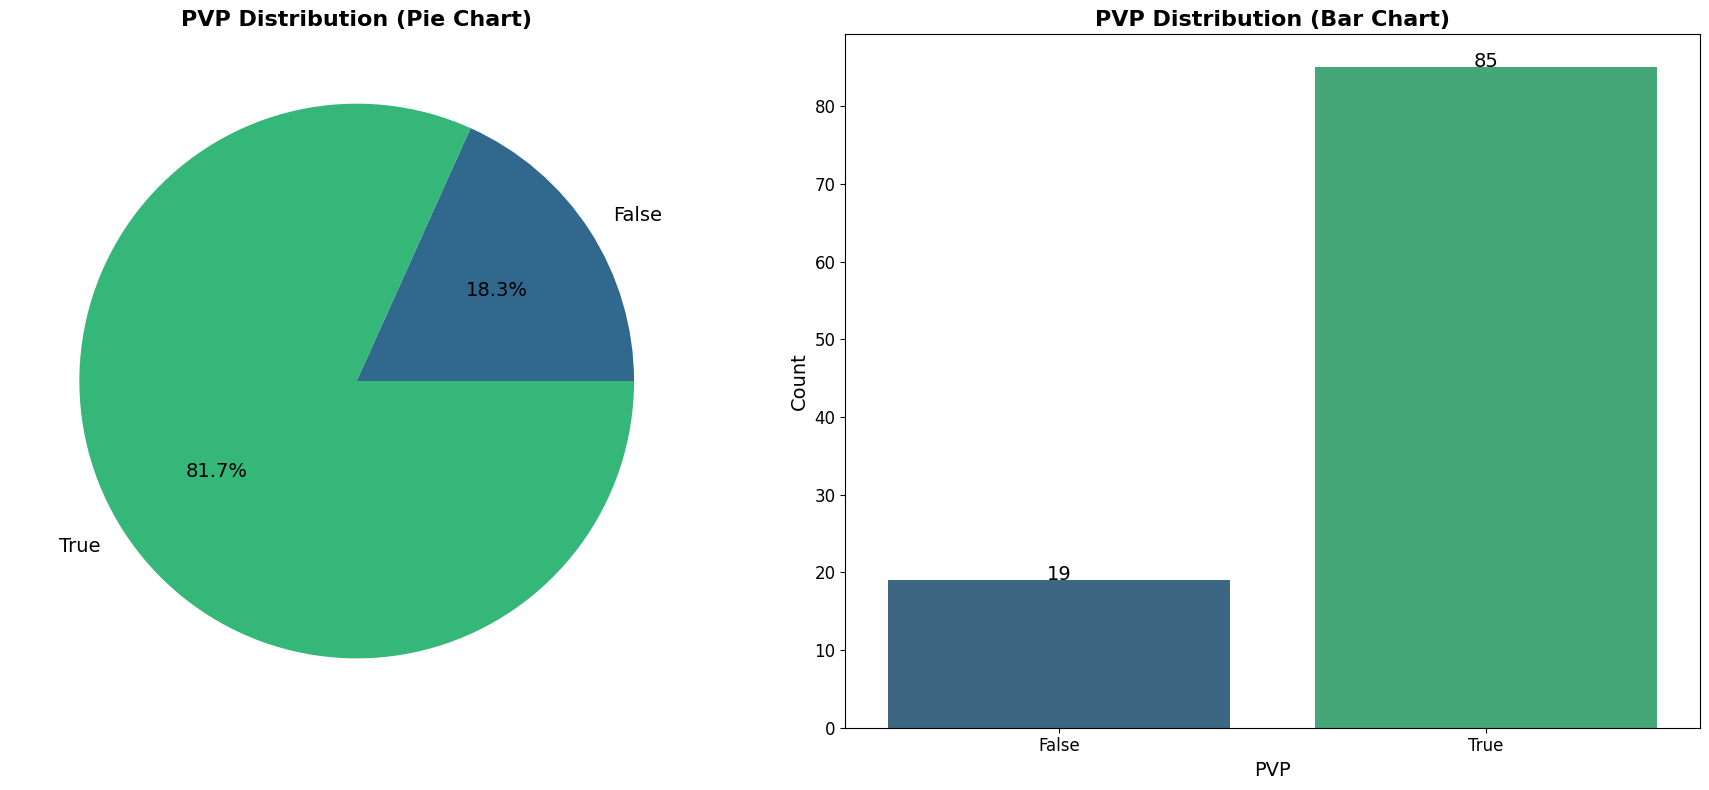

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Pie Chart
axes[0].pie(pvp_count['Count'], 
            labels=pvp_count['PVP'], 
            autopct='%1.1f%%', 
            colors=sns.color_palette('viridis', len(pvp_count)),
            textprops={'fontsize': 14})
axes[0].set_title('PVP Distribution (Pie Chart)', fontsize=16, fontweight='bold')

# Bar Chart
sns.barplot(x='PVP', y='Count', data=pvp_count, palette='viridis', ax=axes[1])
axes[1].set_title('PVP Distribution (Bar Chart)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('PVP', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Label
for index, value in enumerate(pvp_count['Count']):
    axes[1].text(index, value, str(value), color='black', ha="center", fontsize=14)

plt.tight_layout()
plt.show()

Insight
* The data shown that almost all games have the of competitive Player vs Player (PVP)
* The publisher of each game that has PVP content could control the market, which means increasing potential of virtual products to keep up with other player's products. 

## **Conclusion**

Here are the conclusion to **How to make games that are effective (profit-wise and effortless) to develop**:
1. Make a Mobile Game
    * Mobile game are much more easier to access than Personal Computer (PC) games because almost everyone uses smartphone rather than PC
    * Mobile game are also easier to code since they need to adjust to the handheld device 
    
1. Make the game Free
    * Initial paid for the game is not the source of the revenue. 
    * With this, the publishers is also capable to make potential players download the game first before going far with microtransactions.

1. Make the game with Microtransaction 
    * Microtransaction is your main source of profit
    * If your game succeeded, it can produce more than billion USD revenue while the price of games are free
    
1. If necessary, also add Gacha System
    * The gacha system tied directly to microtransaction, because player could brought in-game currency with a real money.
    * Because of that we knew that the player must spend a lot of money since the revenue could reach a billions

1. You don’t have to make it Story Rich, an engaging Gameplay is enough
    * With this you just have to worry about your gameplay coding without to think or hire a scriptwriter for your story
